# Spotipy Imports

In [1]:
import os
import json
import spotipy
import spotipy.util as util
from json.decoder import JSONDecodeError

from config import *

In [2]:
import numpy as np
import pandas as pd

### Username number

In [3]:
username = '12166626141'

In [4]:
scope_list = ['user-read-currently-playing','user-read-playback-state',\
              'user-follow-read','user-library-read','user-top-read','user-read-recently-played']

# Throw all permissions from the list into a string for token function:
scope = ' '.join(scope_list)

## Authourize access

In [5]:
token = util.prompt_for_user_token(username,scope=scope,\
    client_id=client_id,\
    client_secret=client_secret,\
    redirect_uri=redirect_uri)

# except:
#     print("exception")
#     os.remove(f'.cache-{username}')
#     token = util.prompt_for_user_token(username,scope=scope,\
#         client_id=client_id,\
#         client_secret=client_secret,\
#         redirect_uri=redirect_uri)

In [6]:
sp = spotipy.Spotify(auth=token)

#### To see what is stored: print(json.dumps(VARIABLE, sort_keys=True, indent=4))

## Explore Genres to find audio features

 - This will be useful when comparing an artist to a possibly new genre!

In [8]:
# Get a list of genres available for the recommendations function.

genres = sp.recommendation_genre_seeds()
print(json.dumps(genres, sort_keys=True, indent=4))

{
    "genres": [
        "acoustic",
        "afrobeat",
        "alt-rock",
        "alternative",
        "ambient",
        "anime",
        "black-metal",
        "bluegrass",
        "blues",
        "bossanova",
        "brazil",
        "breakbeat",
        "british",
        "cantopop",
        "chicago-house",
        "children",
        "chill",
        "classical",
        "club",
        "comedy",
        "country",
        "dance",
        "dancehall",
        "death-metal",
        "deep-house",
        "detroit-techno",
        "disco",
        "disney",
        "drum-and-bass",
        "dub",
        "dubstep",
        "edm",
        "electro",
        "electronic",
        "emo",
        "folk",
        "forro",
        "french",
        "funk",
        "garage",
        "german",
        "gospel",
        "goth",
        "grindcore",
        "groove",
        "grunge",
        "guitar",
        "happy",
        "hard-rock",
        "hardcore",
        "hardstyle",
  

In [15]:
# Recommend Tracks in specific genre
# Found out recommendations can use attributes <audio_feature> as inputs! 

searchGenres = ["funk"]

recommendedTracks = sp.recommendations(seed_genres=searchGenres, limit=100)

In [16]:
print(json.dumps(recommendedTracks, sort_keys=True, indent=4))

{
    "seeds": [
        {
            "afterFilteringSize": 80,
            "afterRelinkingSize": 80,
            "href": null,
            "id": "funk",
            "initialPoolSize": 80,
            "type": "GENRE"
        }
    ],
    "tracks": [
        {
            "album": {
                "album_type": "ALBUM",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/2AV6XDIs32ofIJhkkDevjm"
                        },
                        "href": "https://api.spotify.com/v1/artists/2AV6XDIs32ofIJhkkDevjm",
                        "id": "2AV6XDIs32ofIJhkkDevjm",
                        "name": "Curtis Mayfield",
                        "type": "artist",
                        "uri": "spotify:artist:2AV6XDIs32ofIJhkkDevjm"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AR",
               

In [17]:
print("Dict Keys for sp.recommendations")
print(recommendedTracks.keys())
print()
print(f'Length of genre tracks is: {len(recommendedTracks["tracks"])}')
print()
print("Dict Keys for each Track")
print(recommendedTracks["tracks"][0].keys())

Dict Keys for sp.recommendations
dict_keys(['tracks', 'seeds'])

Length of genre tracks is: 80

Dict Keys for each Track
dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])


## Extract all track_ids to a list:

#### note: audio_features has a 50 track maximum

In [86]:
# LIst comprehension

genreTrackIDs = [track["id"] for track in recommendedTracks["tracks"]]
genreTrackNames = [track["name"] for track in recommendedTracks["tracks"]]
genreTrackPop = [track["popularity"] for track in recommendedTracks["tracks"]]

genreTrackIDs

['4XsH9zBWPOCdXoH9ZDdS8r',
 '65QiQd4yytULgtiBL7b6ai',
 '3s5dXFe9vDNVhLg332B0Yy',
 '0nyrltZrQGAJMBZc1bYvuQ',
 '1bYBLZUHKK0m93qZ4cMWJC',
 '0mLAgHQP1BOkoHhDu622BQ',
 '66TSoVnJ1P9Tyok03zUlTr',
 '4pW3aTX3kAmOaPJfc9UM12',
 '1uxzFavoQSzR6NhzeSbHdM',
 '7cnWNeQIQutKJmL3MZSfr6',
 '5VJjhHyG8NZ5xdgG6uTb3P',
 '62W5VouctXG9jggZdHaEi1',
 '2fEdBCtMRLHJ53fB7hQVpR',
 '01gDLZsi0j5fWC28FLPNO8',
 '2x1LQq8lsUzAA2wNj8yjC9',
 '6OBeM4d4RGzxcMphQVSgED',
 '1UAA5hS4Ltn4QDmFeh5UCH',
 '6jMpvxSOhGirrDniVBqEjH',
 '2N6RKUqTjFbEBjFlfHyLJZ',
 '2bAmuf7gFx5ziCMcGYjw2v',
 '62fnuo5anKzkxu7fL8kp0d',
 '11SrXDwSAftI8pioXBKtGN',
 '3Ho35OJixLg20qshXRgfBs',
 '4uDPo1KjluMUZ6F15zp4n9',
 '0xbkxTqSaW5blsYgRXpB5I',
 '74iQ3gahRTOGc19bYadBE3',
 '71tafQXxEtS3T5WsFlhoq2',
 '2k7ysbG2zy03fCZOax5HjJ',
 '0BRETWVsgLUOyuw1GQdhiG',
 '5hWLHFSmomXmeTXEE478My',
 '1EIl3D1fyxXRuzcUw3bxen',
 '3pInAc8KCHwv0kEEiamZtu',
 '6emEzY0U6EGCkbQJZvoAvn',
 '75M0s0wMaMxORYUZS3DZ6E',
 '6HZKlK1mDDBsILMoNNncxL',
 '56zGhoVjHxTQTEn1udEOCb',
 '6SLHenZf92A605uJP5dURV',
 

In [41]:
print(len(genreTrackIDs[0:50]))
print(len(genreTrackIDs[50:100]))
# perhaps ask if list is empty before running!

50
30


In [44]:
trackFeatures = [sp.audio_features(genreTrackIDs[i:i+50]) for i in range(0,len(genreTrackIDs),50)]


In [45]:
print(json.dumps(trackFeatures, sort_keys=True, indent=4))

[
    [
        {
            "acousticness": 0.457,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/4XsH9zBWPOCdXoH9ZDdS8r",
            "danceability": 0.784,
            "duration_ms": 233600,
            "energy": 0.708,
            "id": "4XsH9zBWPOCdXoH9ZDdS8r",
            "instrumentalness": 7.5e-05,
            "key": 2,
            "liveness": 0.0913,
            "loudness": -9.141,
            "mode": 1,
            "speechiness": 0.11,
            "tempo": 120.109,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/4XsH9zBWPOCdXoH9ZDdS8r",
            "type": "audio_features",
            "uri": "spotify:track:4XsH9zBWPOCdXoH9ZDdS8r",
            "valence": 0.749
        },
        {
            "acousticness": 0.339,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/65QiQd4yytULgtiBL7b6ai",
            "danceability": 0.62,
            "duration_ms": 274773,
            "energy": 0.807,


In [74]:
allTrackFeatures = []
for i in trackFeatures:
    allTrackFeatures = allTrackFeatures + i

## Create a Dataframe for the genre tracks and analyse like before: 

In [88]:
df_genreFeatures = pd.DataFrame(allTrackFeatures)
df_genreFeatures['Name'] = genreTrackNames
df_genreFeatures['popularity'] = genreTrackPop
df_genreFeatures.set_index('Name',inplace=True)
df_genreFeatures.drop(columns=['analysis_url','track_href','type','uri'], inplace=True)
df_genreFeatures.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
Name,,,,,,,,,,,,,,,
Superfly,0.457,0.784,233600,0.708,4XsH9zBWPOCdXoH9ZDdS8r,0.000075,2,0.0913,-9.141,1,0.1100,120.109,4,0.749,53
Fire,0.339,0.620,274773,0.807,65QiQd4yytULgtiBL7b6ai,0.034300,5,0.3170,-10.769,1,0.0536,107.182,4,0.820,0
Staying Alive,0.129,0.635,239600,0.773,3s5dXFe9vDNVhLg332B0Yy,0.000007,0,0.0562,-5.227,1,0.0772,93.107,4,0.659,48
Get Up Offa That Thing,0.225,0.883,250200,0.664,0nyrltZrQGAJMBZc1bYvuQ,0.000002,4,0.9410,-10.395,1,0.4110,118.104,4,0.800,55
Play That Funky Music,0.124,0.822,301800,0.870,1bYBLZUHKK0m93qZ4cMWJC,0.000000,9,0.0450,-6.257,1,0.0592,109.174,4,0.901,42
Get Down On It,0.195,0.889,213427,0.646,0mLAgHQP1BOkoHhDu622BQ,0.000032,7,0.0502,-6.366,1,0.0668,110.842,4,0.966,52
What Is Hip?,0.138,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,9,0.0892,-5.884,1,0.0563,101.858,4,0.597,51
Express Yourself,0.480,0.789,233613,0.683,4pW3aTX3kAmOaPJfc9UM12,0.000000,8,0.3500,-8.835,1,0.0860,92.311,4,0.882,62
I Wanna Be Your Lover - Single Version,0.236,0.793,180080,0.442,1uxzFavoQSzR6NhzeSbHdM,0.001630,8,0.0662,-11.293,0,0.0564,115.995,3,0.833,47


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df_genreStats = df_genreFeatures.drop(columns=['id','key','mode','time_signature','duration_ms', 'loudness','tempo', 'popularity'])

In [90]:
df_genreStats

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Name,,,,,,,
Superfly,0.45700,0.784,0.708,0.000075,0.0913,0.1100,0.749
Fire,0.33900,0.620,0.807,0.034300,0.3170,0.0536,0.820
Staying Alive,0.12900,0.635,0.773,0.000007,0.0562,0.0772,0.659
Get Up Offa That Thing,0.22500,0.883,0.664,0.000002,0.9410,0.4110,0.800
Play That Funky Music,0.12400,0.822,0.870,0.000000,0.0450,0.0592,0.901
Get Down On It,0.19500,0.889,0.646,0.000032,0.0502,0.0668,0.966
What Is Hip?,0.13800,0.666,0.733,0.000349,0.0892,0.0563,0.597
Express Yourself,0.48000,0.789,0.683,0.000000,0.3500,0.0860,0.882
I Wanna Be Your Lover - Single Version,0.23600,0.793,0.442,0.001630,0.0662,0.0564,0.833


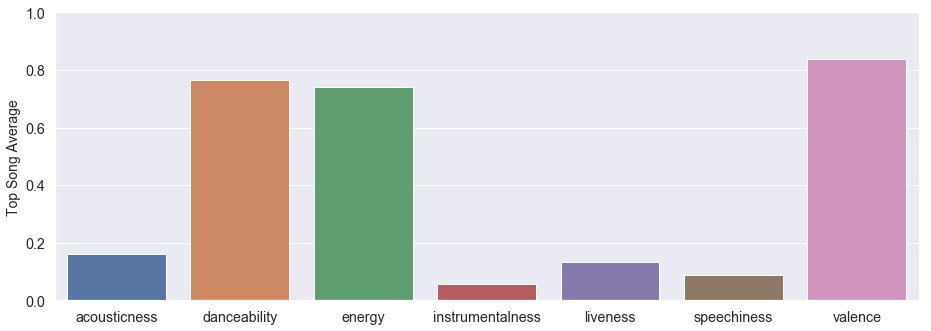

In [82]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.barplot(x=df_genreStats.columns, y=df_genreStats.mean())

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

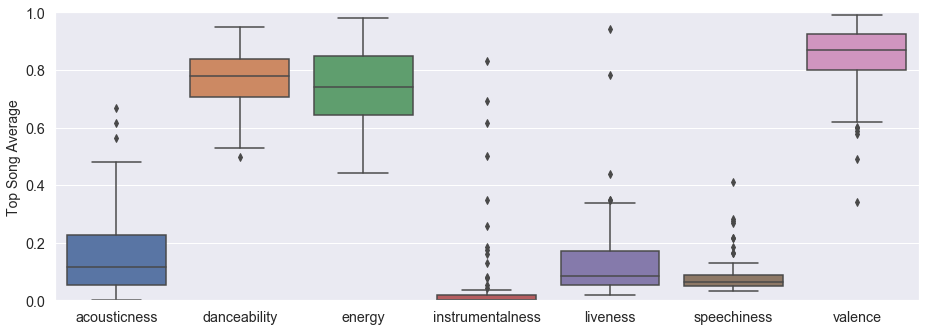

In [83]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.boxplot(x='variable', y='value', data=pd.melt(df_genreStats))
ax.set_xlabel('')
ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

## Find useful ways to represent other data points!

In [93]:
df_genreFeatures.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
Name,,,,,,,,,,,,,,,
Superfly,0.457,0.784,233600,0.708,4XsH9zBWPOCdXoH9ZDdS8r,0.000075,2,0.0913,-9.141,1,0.1100,120.109,4,0.749,53
Fire,0.339,0.620,274773,0.807,65QiQd4yytULgtiBL7b6ai,0.034300,5,0.3170,-10.769,1,0.0536,107.182,4,0.820,0
Staying Alive,0.129,0.635,239600,0.773,3s5dXFe9vDNVhLg332B0Yy,0.000007,0,0.0562,-5.227,1,0.0772,93.107,4,0.659,48
Get Up Offa That Thing,0.225,0.883,250200,0.664,0nyrltZrQGAJMBZc1bYvuQ,0.000002,4,0.9410,-10.395,1,0.4110,118.104,4,0.800,55
Play That Funky Music,0.124,0.822,301800,0.870,1bYBLZUHKK0m93qZ4cMWJC,0.000000,9,0.0450,-6.257,1,0.0592,109.174,4,0.901,42


In [112]:
# map key numbers with actual letter Keys
keyMap = {
    0:"C",
    1:"C#/Db",
    2:"D",
    3:"D#/Eb",
    4:"E",
    5:"F",
    6:"F#/Gb",
    7:"G",
    8:"G#/Ab",
    9:"A",
    10:"A#/Bb",
    11:"B",
}
df_genreFeatures["key"] = df_genreFeatures["key"].map(keyMap)
df_genreFeatures

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
Name,,,,,,,,,,,,,,,
Superfly,0.45700,0.784,233600,0.708,4XsH9zBWPOCdXoH9ZDdS8r,0.000075,D,0.0913,-9.141,1,0.1100,120.109,4,0.749,53
Fire,0.33900,0.620,274773,0.807,65QiQd4yytULgtiBL7b6ai,0.034300,F,0.3170,-10.769,1,0.0536,107.182,4,0.820,0
Staying Alive,0.12900,0.635,239600,0.773,3s5dXFe9vDNVhLg332B0Yy,0.000007,C,0.0562,-5.227,1,0.0772,93.107,4,0.659,48
Get Up Offa That Thing,0.22500,0.883,250200,0.664,0nyrltZrQGAJMBZc1bYvuQ,0.000002,E,0.9410,-10.395,1,0.4110,118.104,4,0.800,55
Play That Funky Music,0.12400,0.822,301800,0.870,1bYBLZUHKK0m93qZ4cMWJC,0.000000,A,0.0450,-6.257,1,0.0592,109.174,4,0.901,42
Get Down On It,0.19500,0.889,213427,0.646,0mLAgHQP1BOkoHhDu622BQ,0.000032,G,0.0502,-6.366,1,0.0668,110.842,4,0.966,52
What Is Hip?,0.13800,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,A,0.0892,-5.884,1,0.0563,101.858,4,0.597,51
Express Yourself,0.48000,0.789,233613,0.683,4pW3aTX3kAmOaPJfc9UM12,0.000000,G#/Ab,0.3500,-8.835,1,0.0860,92.311,4,0.882,62
I Wanna Be Your Lover - Single Version,0.23600,0.793,180080,0.442,1uxzFavoQSzR6NhzeSbHdM,0.001630,G#/Ab,0.0662,-11.293,0,0.0564,115.995,3,0.833,47


In [113]:
keyGroup = df_genreFeatures.groupby(by="key").count()

keyGroup.reset_index(inplace=True)
keyGroup["id"]

0     14
1      5
2      6
3     13
4      8
5      5
6      3
7     10
8      4
9      6
10     6
Name: id, dtype: int64

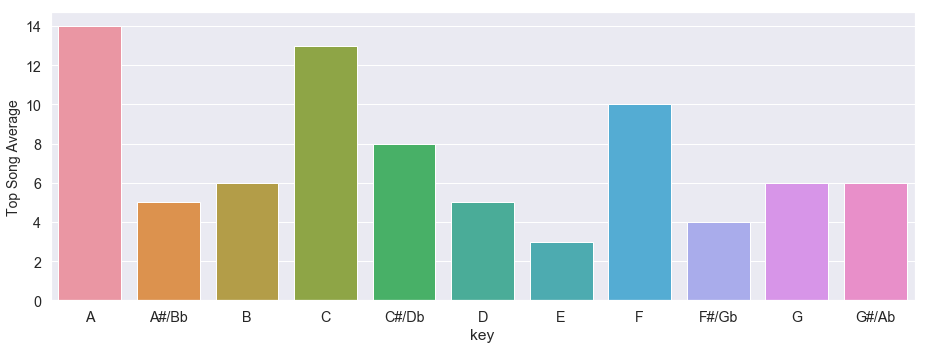

In [114]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="key",y="id",data=keyGroup)

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()